## **Task 1 : Prediction using Supervised ML**

### **Simple Linear Regression**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it invoves just two variables.

In [ ]:
#Import dependencies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
#Store the data using remote link
url = "https://bit.ly/w-data"
df = pd.read_csv(url)

In [ ]:
#Showing first 5 rows
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Checking shape of dataset
df.shape

(25, 2)

In [ ]:
#Checking missing data for each column
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [ ]:
#Checking basic statisical detail
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### **Performing EDA**

Visualizing with scatter plot

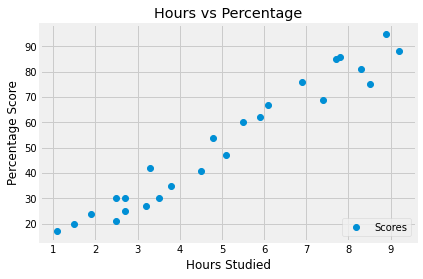

In [ ]:
#Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.legend(loc=4)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

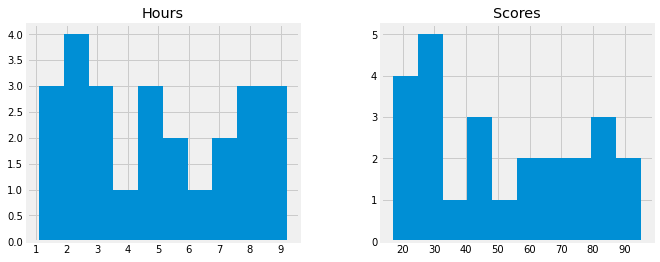

In [ ]:
#Histogram visualization
df.hist(bins=10, figsize=(10,4))
plt.show()

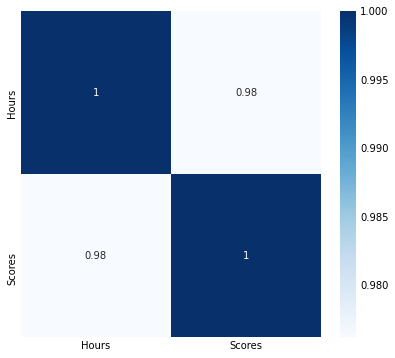

In [ ]:
#Correlation marix with heatmap
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

#Plot shows positive correlation

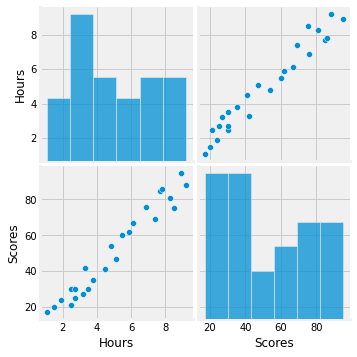

In [ ]:
#Pairplot visualization
sns.pairplot(df)

### **Split the data into independent "X" variable and Dependent "y" variable**

In [ ]:
X = df['Hours']
y = df['Scores']

In [ ]:
#Reshaping the values
X = X.values.reshape(-1, 1)

In [ ]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

### **Split the data into 80% training and 20% testing dataset**

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

### **Create and train the model on training data**

In [ ]:
lr = LinearRegression().fit(X_train, y_train)

### **Predict the model on training dataset**

In [ ]:
y_pred = lr.predict(X_train)
print(X_train)
print(y_pred)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[39.67865467 20.84840735 79.32128059 70.40168976 12.91988217 52.56250809
 78.33021494 34.72332643 84.27660883 93.19619966 62.47316457 36.70545772
 28.77693254 56.52677068 28.77693254 86.25874013 26.79480124 49.58931115
 90.22300272 46.6161142 ]


In [ ]:
pred = lr.predict([[9.25]])
print(pred[0])

93.69173248737539


### **Visualizing prediction on training dataset**

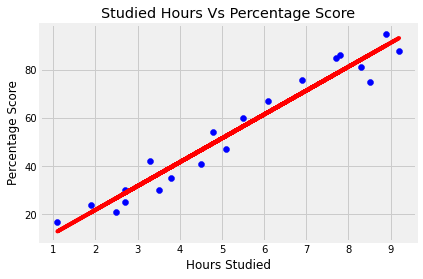

In [ ]:
plt.scatter(X_train, y_train, color="blue")
plt.plot(X_train, lr.predict(X_train), color="red")
plt.title('Studied Hours Vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **Predicting the model on testing dataset**

In [ ]:
y_pred = lr.predict(X_test)
print(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


### **Visualizing prediction on testing dataset**

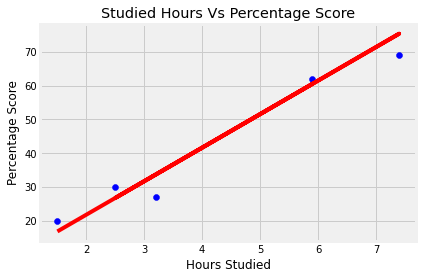

In [ ]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, lr.predict(X_test), color='red')
plt.title('Studied Hours Vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### **Comparing Actual data Vs Predicted result**

In [ ]:
Results = pd.DataFrame(columns=['Actual','Predicted'])
Results['Actual']= y_test
Results['Predicted'] = y_pred
Results

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


### **Predict the score if a student studies for 9.25 hrs/day?**

In [ ]:
hours = 9.25
prediction = lr.predict([[hours]])
print('No of Hours =', hours)
print('Predicted Score =', prediction[0])

No of Hours = 9.25
Predicted Score = 93.69173248737539


### **Evaluate the model using MSE & MAE**

In [ ]:
print('Mean squared error: %.3f' % mean_squared_error(y_test, y_pred))
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, y_pred))

Mean squared error: 21.599
Mean absolute error: 4.184
